In [1]:
from src.data import DataLoaders
from src import utils
import pathlib
import pandas as pd
from src.models.ModelClasses import FireRiskModels, SmokeAlarmModels
from matplotlib import pyplot as plt

In [2]:
ACS =  DataLoaders.ACSData(2016,'block_group')

In [3]:
NFIRS = DataLoaders.NFIRSData('block_group',ACS.tot_pop)
NFIRS_Sev = DataLoaders.NFIRSData('block_group',ACS.tot_pop,sev=True)

/home/kelsonss/anaconda3/envs/rcp2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
ACS_cols_to_use =[ 'did_not_work_past_12_mo',
               'house_pct_live_alone',
               'pct_alt_heat',
               'house_yr_pct_before_1960',
               'inc_pct_poverty',
               'race_pct_black_or_amind']

In [5]:
FSM =  FireRiskModels('severity')
FPM =  FireRiskModels('propensity')

In [6]:
FPM.train(NFIRS,ACS,ACS_cols_to_use)

/home/kelsonss/Documents/GitHub/rcp2/src/models/ModelClasses.py:165: RuntimeWarning: All-NaN axis encountered
  mx = np.nanmax(X, axis =1)
/home/kelsonss/anaconda3/envs/rcp2/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Predicting 2017:
[[147006  44455]
 [  2487   8835]]
0.8595566016456833
              precision    recall  f1-score   support

       False       0.98      0.77      0.86    191461
        True       0.17      0.78      0.27     11322

    accuracy                           0.77    202783
   macro avg       0.57      0.77      0.57    202783
weighted avg       0.94      0.77      0.83    202783

7.995516328457793
Feature ranking:
1. Max (0.385028)
2. Median (0.154249)
3. pct_alt_heat (0.088281)
4. house_pct_live_alone (0.079518)
5. race_pct_black_or_amind (0.075907)
6. house_yr_pct_before_1960 (0.073211)
7. inc_pct_poverty (0.072736)
8. did_not_work_past_12_mo (0.071069)


In [7]:
FSM.train(NFIRS_Sev,ACS,ACS_cols_to_use)

/home/kelsonss/Documents/GitHub/rcp2/src/models/ModelClasses.py:165: RuntimeWarning: All-NaN axis encountered
  mx = np.nanmax(X, axis =1)
/home/kelsonss/anaconda3/envs/rcp2/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Predicting 2017:
[[147895  51155]
 [  1032   2701]]
0.8185501491043077
              precision    recall  f1-score   support

       False       0.99      0.74      0.85    199050
        True       0.05      0.72      0.09      3733

    accuracy                           0.74    202783
   macro avg       0.52      0.73      0.47    202783
weighted avg       0.98      0.74      0.84    202783

8.888891214390483
Feature ranking:
1. Median (0.313726)
2. Max (0.212111)
3. did_not_work_past_12_mo (0.082153)
4. race_pct_black_or_amind (0.080522)
5. pct_alt_heat (0.079632)
6. house_yr_pct_before_1960 (0.078414)
7. inc_pct_poverty (0.077514)
8. house_pct_live_alone (0.075928)


In [8]:
ARC =  DataLoaders.ARCPData()

In [9]:
Smoke = SmokeAlarmModels(ARC.data,ACS.data)

In [10]:
Smoke.train()

In [11]:
NFIRS.fires

,2009,2010,2011,2012,2013,2014,2015,2016,2017
geoid,,,,,,,,,
010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282
010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN
010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN
010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148
010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN
...,...,...,...,...,...,...,...,...,...
560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN
560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN
560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619


In [12]:
out = NFIRS.fires.copy()
out.columns =  'fires_per_1K_pop_' + out.columns

In [14]:
out['fire_propensity_risk_score'] = FPM.test_prediction_probs[:,0]
out['fire_severity_risk_score'] = FSM.test_prediction_probs[:,0]


In [15]:
# Smoke Alarm model munging 


# add number of surveys recorded at the block level
num_surveys_block = Smoke.models['Block_Group']['num_surveys'].copy()
num_surveys_block.index = num_surveys_block.index.str[2:]


out['recorded_home_visits'] = num_surveys_block


# add the statistical model outputs 
Smoke_predicts = Smoke.models['MultiLevel'][
    [ 'detectors_working_prc','detectors_working_CI','geography']].copy()
Smoke_predicts.index = Smoke_predicts.index.str[2:]
out = out.merge(Smoke_predicts,how = 'left', left_index = True, right_index = True)

In [16]:
out['smoke_detector_risk_score'] = 1- out['detectors_working_prc']/100  

In [17]:
out['CombinedRiskScore'] = ( max(out['fire_severity_risk_score'] 
                          + out['fire_propensity_risk_score']) 
                          + out['smoke_detector_risk_score']
                            ) * 100       

In [23]:
out['fire_propensity_risk_score']- out['fire_severity_risk_score']

geoid
010010201001    0.116246
010010201002    0.142520
010010202001    0.657898
010010202002    0.048287
010010203001   -0.001463
                  ...   
560459511001   -0.241161
560459511002    0.413519
560459513001   -0.044829
560459513002    0.158069
560459513003    0.347224
Length: 202783, dtype: float32

/home/kelsonss/anaconda3/envs/rcp2/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/kelsonss/anaconda3/envs/rcp2/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  480.,  1436.,  2349.,  8680., 26769., 50013., 58053., 34173.,
        14710.,  4004.]),
 array([199.91796017, 209.91796017, 219.91796017, 229.91796017,
        239.91796017, 249.91796017, 259.91796017, 269.91796017,
        279.91796017, 289.91796017, 299.91796017]),
 <a list of 10 Patch objects>)

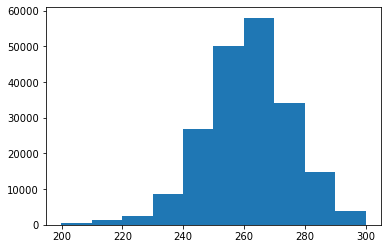

In [19]:
plt.hist(out['CombinedRiskScore'])

In [70]:
out

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,Fire_Severity_model,Fire_Propensity_model,detectors_working_prc,detectors_working_CI,geography,num_surveys,CombinedRiskScore
geoid,,,,,,,,,,,,,,,,
010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282,0.622548,0.622548,31.38,1.089020,state,0.0,193.129525
010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN,0.966579,0.966579,31.38,1.089020,state,0.0,261.935732
010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN,0.740453,0.740453,31.38,1.089020,state,0.0,216.710553
010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148,0.853479,0.853479,31.38,1.089020,state,0.0,239.315889
010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN,0.994841,0.994841,31.38,1.089020,state,0.0,267.588124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN,0.652114,0.652114,38.90,3.199404,state,0.0,191.522711
560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN,0.592363,0.592363,38.90,3.199404,state,0.0,179.572540
560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619,0.918188,0.918188,38.90,3.199404,state,3.0,244.737524


In [73]:
out =  out.merge(ACS.data,how = 'left', left_index=True, right_index = True)

In [74]:
out.to_csv(utils.DATA['model-outputs'] / 'CombinedModels.csv')

In [83]:
out

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,Fire_Severity_model,Fire_Propensity_model,detectors_working_prc,detectors_working_CI,geography,num_surveys,CombinedRiskScore
geoid,,,,,,,,,,,,,,,,
010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282,0.622548,0.622548,31.38,1.089020,state,0.0,193.129525
010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN,0.966579,0.966579,31.38,1.089020,state,0.0,261.935732
010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN,0.740453,0.740453,31.38,1.089020,state,0.0,216.710553
010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148,0.853479,0.853479,31.38,1.089020,state,0.0,239.315889
010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN,0.994841,0.994841,31.38,1.089020,state,0.0,267.588124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN,0.652114,0.652114,38.90,3.199404,state,0.0,191.522711
560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN,0.592363,0.592363,38.90,3.199404,state,0.0,179.572540
560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619,0.918188,0.918188,38.90,3.199404,state,3.0,244.737524


In [ ]:
1+1